
# Multilayer Perceptron for MNIST Classification

In this notebook, we will explore the use of a Multilayer Perceptron (MLP) to classify handwritten digits from the MNIST dataset. The MNIST dataset is a classic dataset in the machine learning community, consisting of 70,000 images of handwritten digits (0-9) with corresponding labels.

## Introduction to MLP

A Multilayer Perceptron (MLP) is a type of artificial neural network that consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Each node (neuron) in one layer connects with a certain weight to every node in the next layer. MLPs are capable of modeling complex relationships in data.

## Important Hyperparameters

When working with MLPs, several hyperparameters are crucial to understand and experiment with:

- **Number of Hidden Layers**: The number of hidden layers can affect the model's ability to learn complex patterns. More layers can capture more complexity but also increase the risk of overfitting.
- **Number of Neurons per Layer**: The number of neurons in each hidden layer determines the model's capacity. More neurons can learn more features but also increase computation time.
- **Activation Function**: The activation function introduces non-linearity into the model, allowing it to learn more complex patterns. Common activation functions include ReLU, Sigmoid, and Tanh.
- **Use of Bias**: Bias terms can help the model learn patterns that do not pass through the origin.

We will also explore how to build a graphical user interface (GUI) to draw and classify digits using the trained MLP model.

## Exercise

At the end of the notebook, you will be given a challenge to further solidify your understanding of MLPs and their hyperparameters.

Let's get started!


In [ ]:
!pip install torch torchvision matplotlib ipywidgets

In [5]:
import numpy as np
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from ipywidgets import interact, widgets, VBox, HBox
from IPython.display import display

# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

# Define a function to create the MLP model
def create_model(input_size, hidden_sizes, output_size, activation_fn, use_bias):
    layers = []
    previous_size = input_size
    for size in hidden_sizes:
        layers.append(nn.Linear(previous_size, size, bias=use_bias))
        if activation_fn == 'ReLU':
            layers.append(nn.ReLU())
        elif activation_fn == 'Sigmoid':
            layers.append(nn.Sigmoid())
        elif activation_fn == 'Tanh':
            layers.append(nn.Tanh())
        previous_size = size
    layers.append(nn.Linear(previous_size, output_size, bias=use_bias))
    return nn.Sequential(*layers)

# Training function
def train_model(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images.view(images.shape[0], -1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

# Testing function
def test_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images.view(images.shape[0], -1))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total} %")

# Function to handle training when the button is clicked
def on_button_click(b):
    input_size = 784
    output_size = 10
    hidden_sizes = [sizes_widget.value for _ in range(layers_widget.value)]
    activation_fn = activation_fn_widget.value
    use_bias = use_bias_widget.value
    save_model = save_model_widget.value
    epochs = epochs_widget.value
    
    print(f'Creating model with parameters:\nNumber of hidden layers: {layers_widget}\nLayers size: {hidden_sizes}\nActivation function: {activation_fn}\nBias: {use_bias}')
    model = create_model(input_size, hidden_sizes, output_size, activation_fn, use_bias)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    train_model(model, trainloader, criterion, optimizer, epochs=epochs)
    test_model(model, testloader)
    
    if save_model:
        torch.save(model.state_dict(), 'saved_mlp.pth')
        print("Model saved to 'saved_mlp.pth'")
        config = {
            'input_size': input_size,
            'hidden_sizes': hidden_sizes,
            'output_size': output_size,
            'activation_fn': activation_fn,
            'use_bias': use_bias
        }
        with open('saved_mlp_config.json', 'w') as f:
            json.dump(config, f)
    

# Interactive widget setup
activation_fn_widget = widgets.Dropdown(options=['ReLU', 'Sigmoid', 'Tanh'], description='Activation:')
use_bias_widget = widgets.Checkbox(value=True, description='Use Bias')
layers_widget = widgets.IntSlider(min=1, max=5, step=1, value=2, description='Layers')
sizes_widget = widgets.IntSlider(min=10, max=200, step=10, value=50, description='Layer Size')
epochs_widget = widgets.IntSlider(min=5, max=50, step=5, value=10, description='Epochs')
save_model_widget = widgets.Checkbox(value=False, description='Save Model')
run_button = widgets.Button(description="Run")

# Set up the event handler for the button
run_button.on_click(on_button_click)

# Display the widgets
display(VBox([activation_fn_widget, use_bias_widget, layers_widget, sizes_widget, epochs_widget, save_model_widget, run_button]))


Creating model with parameters:
Number of hidden layers: IntSlider(value=2, description='Layers', max=5, min=1)
Layers size: [20, 20]
Activation function: ReLU
Bias: True
Epoch 1, Loss: 0.4076088656431068
Epoch 2, Loss: 0.1985694138503977
Epoch 3, Loss: 0.16490755956580264
Epoch 4, Loss: 0.1462847101889344
Epoch 5, Loss: 0.13418447413344756
Epoch 6, Loss: 0.1248918542070493
Epoch 7, Loss: 0.11678489445369127
Epoch 8, Loss: 0.11241541207154422
Epoch 9, Loss: 0.10571396660689177
Epoch 10, Loss: 0.10440011175502259
Epoch 11, Loss: 0.10022616436752652
Epoch 12, Loss: 0.09819053206692087
Epoch 13, Loss: 0.09431577765388784
Epoch 14, Loss: 0.09235100760268591
Epoch 15, Loss: 0.08923873546317831
Epoch 16, Loss: 0.0865271061242842
Epoch 17, Loss: 0.08628233845856016
Epoch 18, Loss: 0.08039897095674137
Epoch 19, Loss: 0.08247044659815411
Epoch 20, Loss: 0.08164934298571652
Epoch 21, Loss: 0.07962259392255047
Epoch 22, Loss: 0.07671939689211293
Epoch 23, Loss: 0.07590932152924071
Epoch 24, Loss:

In [6]:
# Create and train a simple model for the GUI if the file does not exist
model_path = 'saved_mlp.pth'
config_path = 'saved_mlp_config.json'

try:
    # Load the model configuration
    with open(config_path, 'r') as f:
        config = json.load(f)

    print(f'Loading {model_path} state')
    simple_model = create_model(
        config['input_size'], 
        config['hidden_sizes'], 
        config['output_size'], 
        config['activation_fn'], 
        config['use_bias']
    )
    simple_model.load_state_dict(torch.load(model_path))

except FileNotFoundError:
    # Alternatively, manually create a new model here with new hyperparameters
    simple_model = create_model(784, [128, 64], 10, 'ReLU', True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(simple_model.parameters(), lr=0.01, momentum=0.9)
    train_model(simple_model, trainloader, criterion, optimizer, epochs=5)
    torch.save(simple_model.state_dict(), model_path)


Loading saved_mlp.pth state



## Drawing and Classifying Digits

Next, we will create a graphical user interface (GUI) to draw and classify digits using the trained MLP model. The GUI will allow you to draw a digit, reset the canvas, and classify the drawn digit.


In [24]:
import tkinter as tk
from tkinter import messagebox

# GUI for inputting numbers
class DigitClassifierGUI:
    def __init__(self, model):
        self.model = model
        self.root = tk.Tk()
        self.root.title("Digit Classifier")
        
        self.canvas = tk.Canvas(self.root, width=280, height=280, bg="white")
        self.canvas.grid(row=0, column=0, columnspan=2)
        self.canvas.bind("<B1-Motion>", self.paint)
        
        self.reset_button = tk.Button(self.root, text="Reset", command=self.reset)
        self.reset_button.grid(row=1, column=0)
        
        self.classify_button = tk.Button(self.root, text="Classify", command=self.classify)
        self.classify_button.grid(row=1, column=1)
        
        self.image = np.zeros((28, 28))
        
        self.root.mainloop()
    
    def paint(self, event):
        x, y = event.x, event.y
        self.canvas.create_rectangle((x, y) * 2, outline="black", width=20)
        self.image[y//10, x//10] = 1.0
        
    def reset(self):
        self.canvas.delete("all")
        self.image = np.zeros((28, 28))
        
    def classify(self):
        input_tensor = torch.tensor(self.image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        input_tensor = input_tensor.view(1, -1)
        mean = 0.1307
        std = 0.3081
        input_tensor = (input_tensor - mean) / std 
        with torch.no_grad():
            output = self.model(input_tensor)
            _, predicted = torch.max(output.data, 1)
            messagebox.showinfo("Prediction", f'Predicted Number: {predicted.item()}')
            print(f'Predicted Number: {predicted.item()}')

# Initialize the GUI
DigitClassifierGUI(simple_model)


Predicted Number: 8



## Challenge

Now that you have learned how to create and train a Multilayer Perceptron, and how to use it to classify handwritten digits, it's time for a challenge!

### Challenge

1. **Experiment with Hyperparameters**: Modify the number of hidden layers, the number of neurons per layer, the activation function, and the use of bias in the MLP model. Train the model with these different configurations and observe how the performance changes. Try to find the best configuration that gives you the highest accuracy on the MNIST test set.

2. **Implement a Different Activation Function**: Research and implement a different activation function (e.g., Leaky ReLU, ELU). Integrate this activation function into the `create_model` function and observe how it affects the model's performance.

3. **Data Augmentation**: Implement data augmentation techniques (e.g., rotation, scaling, translation) to artificially increase the size of the training dataset. Train the MLP model with the augmented dataset and observe if there is any improvement in the accuracy.

### Tips

- Use the `torchvision.transforms` module to implement data augmentation.
- Keep track of the hyperparameters and their corresponding performance to identify the best configuration.

Good luck and have fun experimenting!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


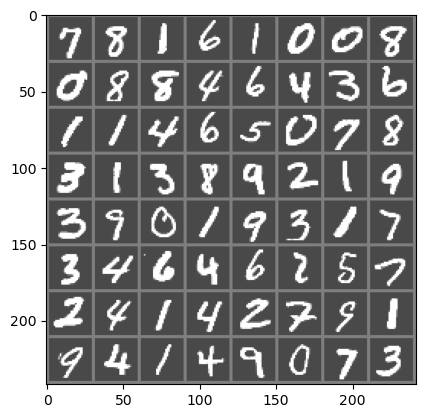

Labels:     7     8     1     6


In [11]:
import matplotlib.pyplot as plt
from torchvision import utils


# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(utils.make_grid(images))

# Print labels
print('Labels:', ' '.join('%5s' % labels[j].item() for j in range(8)))


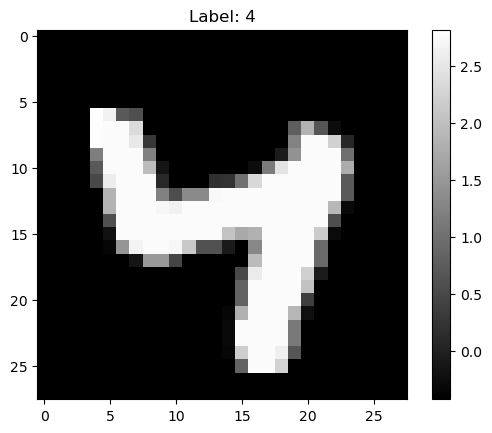

First image pixel values:
[[[-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296]
  [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
   -0.424212

In [18]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Check the pixel values of the first image
first_image = images[0].numpy()

# Plot the first image to visualize
plt.imshow(first_image.squeeze(), cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.colorbar()
plt.show()

# Print the pixel values of the first image
print("First image pixel values:")
print(first_image)
